In [1]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes_data = pd.read_csv("Dataset/diabetes.csv", header=None, names=col_names)
#diabetes_data.iloc[[464]] to print a particular columns 

In [3]:
#Eliminate first row
diabetes_data = diabetes_data.iloc[1:]
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.iloc[[302]]

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
303,5,77,82,41,42,35.8,0.156,35,0


In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'insulin','bmi','pedigree','age']
X = diabetes_data[feature_cols] # Features
y = diabetes_data.label # Target variable

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1000)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

662    1
123    0
114    0
15     1
530    0
      ..
367    1
302    1
383    0
141    0
464    0
Name: label, Length: 192, dtype: object

In [8]:
#predicting the output for out test set
y_pred=logreg.predict(X_test)
y_pred

array(['1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [9]:
X_test

,pregnant,glucose,bp,insulin,bmi,pedigree,age
662,1,199,76,0,42.9,1.394,22
123,2,107,74,100,33.6,0.404,23
114,4,76,62,0,34,0.391,25
15,5,166,72,175,25.8,0.587,51
530,0,111,65,0,24.6,0.66,31
...,...,...,...,...,...,...,...
367,6,124,72,0,27.6,0.368,29
302,2,144,58,135,31.6,0.422,25
383,1,109,60,182,25.4,0.947,21
141,3,128,78,0,21.1,0.268,55


In [10]:
# import the metrics class to create confusion matrics
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

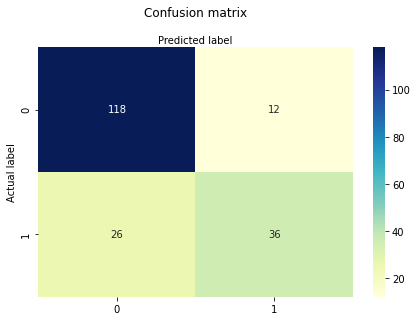

In [11]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8020833333333334


In [13]:
import pickle 

In [14]:
#saving the model to disk 
pickle.dump(logreg, open('model.pkl','wb'))

In [15]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[6,]]))

ValueError: X has 1 features per sample; expecting 7